# Practical work 1: introduction and image enhancement 

- Quick start for Python (10 minutes!) : https://www.stavros.io/tutorials/python/
- Quick start for Numpy : https://numpy.org/devdocs/user/quickstart.html#
- For Matlab users: Numpy is very similar but with some important difference, see http://mathesaurus.sourceforge.net/matlab-numpy.html.
- Keep in mind that in Python, exception of variable of scalar type, all is reference and affectation is not a copy. 


## Short introduction to image processing with Python

Help: use the function `help()` to get information on a Python objet. 

Images are stored as arrays that is the default type of the `numpy` module. Defaut type of array elements is `float64` according to the IEEE754 norm. Special float values are defined: infinity (`inf`) and undefined (`nan`, *not a number*), and some numerical constants, such as $\pi$.
 


In [3]:
# import numpy
import numpy as np

# predefined constants
print(np.inf,np.nan,np.pi)

# some values
print( 1., 1e10, -1.2e-3)


inf nan 3.141592653589793
1.0 10000000000.0 -0.0012


### Creating an array: several ways.

1. From a list of values (formally any Python iterable object). Elements of an array have the same **type**, determined by Numpy:

In [5]:
V = np.array([1,2,3])
M = np.array([[1,2,3],[4,5,6.]])
print ("V is of type",V.dtype)
print ("M is of type",M.dtype)

V is of type int64
M is of type float64


2. Without values: Numpy has constructors such as `empty()`, `zeros()`, `ones()`... Shape should be given (see below). Important: `empty()` does not initialize array elements.

In [8]:
I = np.zeros((3,4))
print(I)
J = np.empty((4,3))
print(J)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


3. From a sequence, prefer `arange()` from numpy to `range()` from python.

In [9]:
print(np.arange(10))
print(np.arange(0,10,2))
print(np.arange(9,-1,-.5))

[0 1 2 3 4 5 6 7 8 9]
[0 2 4 6 8]
[ 9.   8.5  8.   7.5  7.   6.5  6.   5.5  5.   4.5  4.   3.5  3.   2.5
  2.   1.5  1.   0.5  0.  -0.5]


### Shape of an array

Shape decribes the number of elements for each dimension. A vector is of dimension 1, a matrix is of dimension 2. Superior dimensions are possible. Shape is not size that is the number of elements of an array. Type of shape is always a tuple of integers. With previous example: 

In [10]:
print(I.shape, I.size)
print(J.shape, J.size)
print(V.shape, V.size)

(3, 4) 12
(4, 3) 12
(3,) 3


An important function/method is `reshape()` to change the shape of an array. Typical usage of `reshape()` is to transform a vector into a matrix or reciprocally. 

In [12]:
K = np.arange(12).reshape((3,4))
print(K)
print(np.reshape(K,(12)))
print(K.reshape((2,2,3)))

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[ 0  1  2  3  4  5  6  7  8  9 10 11]
[[[ 0  1  2]
  [ 3  4  5]]

 [[ 6  7  8]
  [ 9 10 11]]]


### Elements of an array

Access element by indices: two syntaxe are possible, the first given in the example is prefered. Negative index is possible with the same meanning of Python list.

In [13]:
I = np.arange(12).reshape((3,4))
print(I[1,2])
print(I[0][0])
print(I[-1,0])

6
0
8


Access by group of indices using the operator `:` allows to extract subarray. General syntaxe is `start:end:step` and it is very powerfull:

In [17]:
print('extract the first line')
print(I[0,:])
print(I[0,0:])
print(I[0,::])
print(I[0,::1])

print('extract center of the array')
print(I[1:3,1:3])

print('extract elements with even indices')
print(I[::2,::2])

print('print the horizontal mirror of an array')
print(I[:,::-1])


extract the first line
[0 1 2 3]
[0 1 2 3]
[0 1 2 3]
[0 1 2 3]
extract center of the array
[[ 5  6]
 [ 9 10]]
extract elements with even indices
[[ 0  2]
 [ 8 10]]
print the horizontal mirror of an array
[[ 3  2  1  0]
 [ 7  6  5  4]
 [11 10  9  8]]


### Array arithmetic

Operators and functions can be applied to arrays. Mostly, operations are element-wise (i.e. applied element by element). The consequence is arrays should have the same shape. One operand can also be scalar in most of time.

In [18]:
A = np.arange(12).reshape((3,4))
B = 2 * A + 1
C = A + B
D = np.cos(2*np.pi*A/12)

print (D)
print (D**2)
print (D>0)

[[ 1.00000000e+00  8.66025404e-01  5.00000000e-01  6.12323400e-17]
 [-5.00000000e-01 -8.66025404e-01 -1.00000000e+00 -8.66025404e-01]
 [-5.00000000e-01 -1.83697020e-16  5.00000000e-01  8.66025404e-01]]
[[1.00000000e+00 7.50000000e-01 2.50000000e-01 3.74939946e-33]
 [2.50000000e-01 7.50000000e-01 1.00000000e+00 7.50000000e-01]
 [2.50000000e-01 3.37445951e-32 2.50000000e-01 7.50000000e-01]]
[[ True  True  True  True]
 [False False False False]
 [False False  True  True]]


Array may be viewed as matrix, we can make some linear algebraic manipulation. For example, `np.matmul()` is the matrix multiplication. It can be used to build matrix from vector. An example, using the transpose operator `T`. 

In [19]:
L = np.arange(1,6).reshape((1,5))
# transpose of L. Warning: C remains a reference to L
C = L.T
# This could be better if your want to touch L 
C = L.T.copy()

print("A 5*5 matrix:")
print(np.matmul(C,L))

print("A dot product, but result is a matrix:")
print(np.matmul(L,C))
print(np.matmul(L,C)[0,0])

print("dot() is prefered with vectors:")
V = np.arange(1,6)
print(V.dot(V))
print(np.dot(V,V))

A 5*5 matrix:
[[ 1  2  3  4  5]
 [ 2  4  6  8 10]
 [ 3  6  9 12 15]
 [ 4  8 12 16 20]
 [ 5 10 15 20 25]]
A dot product, but result is a matrix:
[[55]]
55
dot() is prefered with vectors:
55
55


### Images

We make use of PIL module (https://pillow.readthedocs.io/en/stable/reference/Image.html) to load and write an image and easily converted to Numpy array. Be careful: array type depends on image.

In [108]:
from PIL import Image

# reading an image and convert to array
myimage = np.array(Image.open('image.tif'))

# write an image (alternative format) from an array
Image.fromarray(myimage).save('image.tif')

Array can be displayed as an image using Matplotlib module. Here a short example:

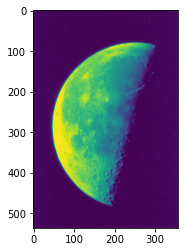

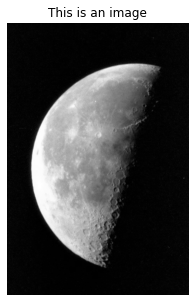

In [109]:
import matplotlib.pyplot as plt

# minimal example:
plt.imshow(myimage)
plt.show()

# with more controls:
w,h=400,400
plt.figure(figsize=(w/80,h/80))  # optional, to control the size of figure (unit: pixel)
plt.gray() # optional call to display image using a gray colormap
plt.title('This is an image') # optional: add a title
plt.axis('off') # optional: remove axes
plt.imshow(myimage)
plt.show()


See also:
- https://matplotlib.org/3.1.1/tutorials/introductory/images.html
- https://matplotlib.org/gallery/images_contours_and_fields/image_demo.html#sphx-glr-gallery-images-contours-and-fields-image-demo-py). 

## Exercice 1
In this exercice, we work with image `img/moon.tif`. If possible give two solutions : one with loops (for, while, ...) and one without loops. 

1. Write and test a function `openImage()` getting an image filename as argument and returning the array of pixel values.

In [2]:
from PIL import Image
import numpy as np

def openImage(fname):
   return np.array(Image.open(fname))
print (openImage("img/moon.tif"))

[[ 1  3  7 ...  8 16  8]
 [ 3  7  3 ...  4 11 12]
 [ 6  4  6 ...  7  2  3]
 ...
 [ 4  8  8 ...  6  4  8]
 [ 4  8  8 ...  4  6  6]
 [ 2  3  3 ...  6  9  9]]


2. Write and test a function `countPixels()` getting an array and an integer `k` as arguments and returning the number of pixels having the value `k`.

In [3]:
def countPixels(I,k):
    return np.count_nonzero(I== k)
    
myImg=openImage("img/moon.tif")
print (countPixels(myImg,1))

20126


3. Write and test a function `replacePixels()` getting an array and two intergers and replacing pixels having `k1`value to `k2` value and returning the new array. Be aware to not modify `I`.

In [4]:
def replacePixels(I,k1,k2):
    test=np.copy(I)
    test[test==k1]=k2
    return test
print(countPixels(replacePixels(myImg,1,0),0))
print(countPixels(myImg,1)+countPixels(myImg,0))



21585
21585


4. Write and test a function `normalizeImage()` getting an array and two integers `k1` and `k2` and returning an array with elements normalized to the interval $[k_1,k_2]$. 

In [86]:
def normalizeImage(I,I1,I2):
    test=np.copy(I)
    test=np.where(True, I1+((I2-I1)/(np.max(test)-np.min(test))*(test-np.min(test))), test)
    return test.astype(int)
print(myImg)
print (normalizeImage(myImg,2,np.max(myImg)))


[[ 1  3  7 ...  8 16  8]
 [ 3  7  3 ...  4 11 12]
 [ 6  4  6 ...  7  2  3]
 ...
 [ 4  8  8 ...  6  4  8]
 [ 4  8  8 ...  4  6  6]
 [ 2  3  3 ...  6  9  9]]
[[ 2  4  8 ...  9 17  9]
 [ 4  8  4 ...  5 12 13]
 [ 7  5  7 ...  8  3  4]
 ...
 [ 5  9  9 ...  7  5  9]
 [ 5  9  9 ...  5  7  7]
 [ 3  4  4 ...  7 10 10]]


5. Write and test a function `inverteImage()` getting an array and returning and arry having inverted pixel values (i.e. the transform $k \mapsto 255-k$

In [87]:
def inverteImage(I):
    test=np.copy(I)
    test=np.where(True, np.max(test)-test, test)
    return test
print(myImg)
print(inverteImage(myImg))

[[ 1  3  7 ...  8 16  8]
 [ 3  7  3 ...  4 11 12]
 [ 6  4  6 ...  7  2  3]
 ...
 [ 4  8  8 ...  6  4  8]
 [ 4  8  8 ...  4  6  6]
 [ 2  3  3 ...  6  9  9]]
[[252 250 246 ... 245 237 245]
 [250 246 250 ... 249 242 241]
 [247 249 247 ... 246 251 250]
 ...
 [249 245 245 ... 247 249 245]
 [249 245 245 ... 249 247 247]
 [251 250 250 ... 247 244 244]]


6. Write and test a function `computeHistogram()` getting an array and returning its histogram. Type of histogram can be an array or a list. It is forbidden to use an histogram method from a Python module. Is it possible to compute the histogram without explicitely visiting array pixels? 

In [193]:
def computeHistogram(I):
     res=np.zeros(np.max(I)+1)
     for i in range (res.size):
        res[i]=countPixels(I,i)
     return res.astype(int) 

print(myImg)
print(computeHistogram(myImg))
    
# use comments to answer to a verbal question

[[ 1  3  7 ...  8 16  8]
 [ 3  7  3 ...  4 11 12]
 [ 6  4  6 ...  7  2  3]
 ...
 [ 4  8  8 ...  6  4  8]
 [ 4  8  8 ...  4  6  6]
 [ 2  3  3 ...  6  9  9]]
[ 1459 20126 30924 25408 17167 11368  7369  4767  3213  2178  1486   993
   632   488   371   301   255   217   201   202   190   165   168   140
   160   157   129   136   140   135   137   121   137   114   127   129
   115   132   123   124   101    91   122   116   129   109   108   116
   113   123   109   140   101   109   114   117   140   127   140   142
   129   134   192   160   179   165   170   154   155   159   164   184
   166   180   169   132   153   171   165   156   166   142   151   179
   159   154   167   166   179   163   195   198   181   216   230   231
   250   256   264   291   245   242   279   247   261   304   287   286
   296   286   292   296   285   312   274   312   282   308   296   267
   273   304   327   263   286   282   272   246   238   227   243   225
   239   233   242   248   258   262   26

7. Write and test a function `thresholdImage()` getting an array `I` and an integer `s` and returning an array having elements set to 0 if corresponding element of `I` is lower than `s` or 255 otherwise.

In [102]:
def thresholdImage(I,s):
    test=np.copy(I)
    test=np.where(test<s, 0, 255)
    return test
print(myImg)
print(thresholdImage(myImg,9))

[[ 1  3  7 ...  8 16  8]
 [ 3  7  3 ...  4 11 12]
 [ 6  4  6 ...  7  2  3]
 ...
 [ 4  8  8 ...  6  4  8]
 [ 4  8  8 ...  4  6  6]
 [ 2  3  3 ...  6  9  9]]
[[  0   0   0 ...   0 255   0]
 [  0   0   0 ...   0 255 255]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0 255 255]]


8. Using previous functions, give a series of instructions to read then to display an image, plot the histogram (one can use `plot()` or `bar()` from `matplotlib.pyplot` module), inverse the image and display it, plot its histogram.

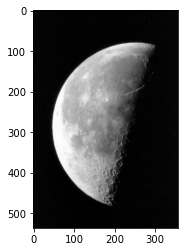

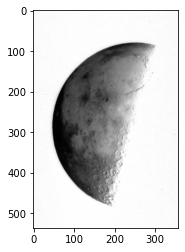

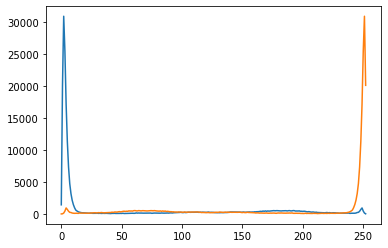

In [136]:
import matplotlib.pyplot as plt

## your code start below
img = np.array(Image.open('image.tif'))
plt.imshow(img)
plt.show()
imgInverse=inverteImage(img)
plt.imshow(imgInverse)
plt.show()
plt.plot(computeHistogram(img))
plt.plot(computeHistogram(imgInverse))



9. Give a series of instructions to read and display an image, plot the histogram, normalize the image to the interval $[10,50]$, compute the new histogram, display the image and the histogram. Remark: `imshow()` normalizes image. To avoid this and see the effect of the normalization, use `imshow()` with parameters `vmin=0,vmax=255`. Comment the results.

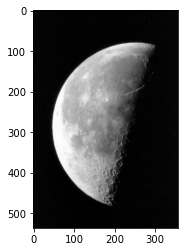

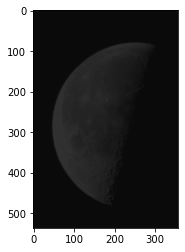

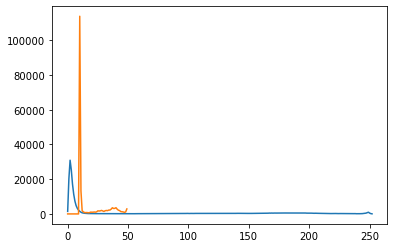

In [138]:
img = np.array(Image.open('image.tif'))
plt.imshow(img)
plt.show()

img2=normalizeImage(img,10,50)
plt.imshow(img2,vmin=0,vmax=255)
plt.show()

plt.plot(computeHistogram(img))
plt.plot(computeHistogram(img2))

10. Same question than 9. remplacing the normalization by a thresholding with parameter $s=127$.

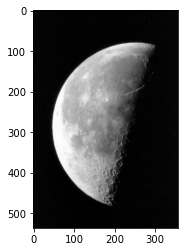

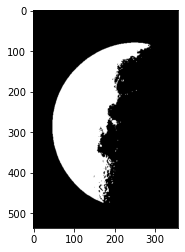

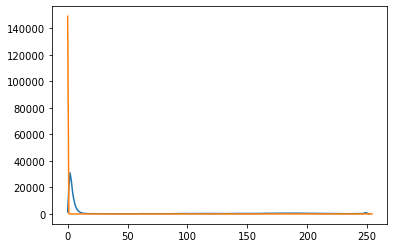

In [139]:
img = np.array(Image.open('image.tif'))
plt.imshow(img)
plt.show()

img2=thresholdImage(img,127)
plt.imshow(img2,vmin=0,vmax=255)
plt.show()

plt.plot(computeHistogram(img))
plt.plot(computeHistogram(img2))

## Exercice 2 - generate images

1. Create the array `I` 4 by 4 corresponding to the following image: <div> 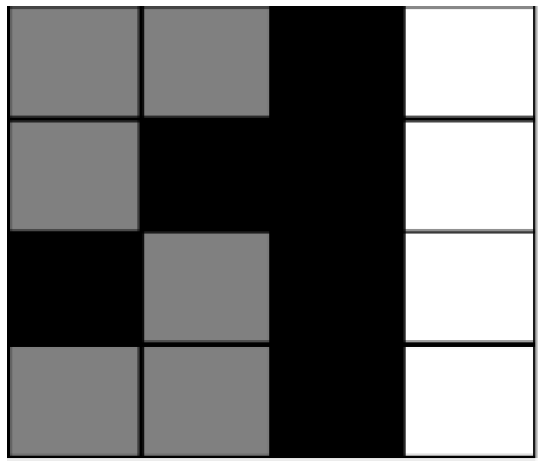 </div> Black pixels have value 0, white pixels value 255, and grey pixels value 127. Display the image using `imshow()` and plot the histogram.

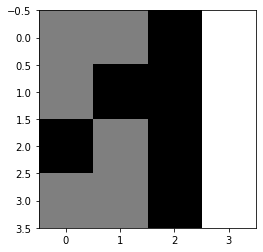

In [142]:
image=np.array([[127,127,0,255],[127,0,0,255],[0,127,0,255],[127,127,0,255]])
plt.imshow(image)
plt.show()



2. We want to generate a matrix having random values. Functions `rand()` and `randn()` from  `numpy.matlib` module generate array of given shape with random values following respectively a uniform distribution on $[0,1[$ and a normal distribution. Create an array of shape 512 by 512 having **integer** elements following an uniform distribution in the set $\{0,1,\cdots,255\}$ . We also want to create an array following a gaussian distribution with a mean of 128 and a standard deviation of 16 and with **integer** values.  Display the images and their histogramms. Discuss the results.

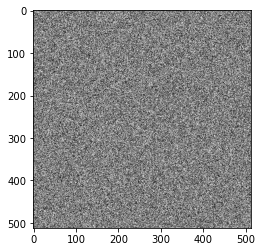

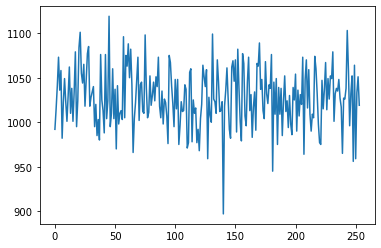

In [162]:
import numpy.matlib

mat1=(255*np.random.rand(512,512)).astype(int)
plt.imshow(mat1)
plt.show()
plt.plot(computeHistogram(mat1))

## Exercice 3: image manipulation
In this exercice, we work with image `img/pout.tif`. 

1. Read and display this image

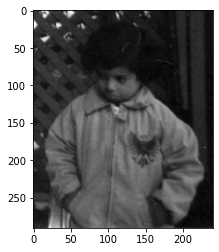

In [163]:
img = np.array(Image.open('img/pout.tif'))
plt.imshow(img)
plt.show()

2. Examine the histogram. Determine the extrema of the image. What can you say about the quality of this image?

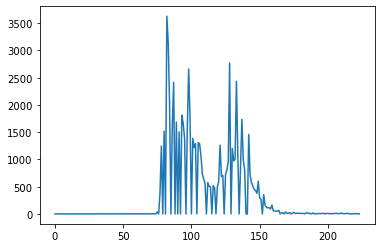

In [164]:
plt.plot(computeHistogram(img))

3. Using functions from Exercice 1, write the function `histogramEqualization()` getting one image, its histogram,  applying an histogram equalization and returning the new image. Test this function on `pout.tif` and discuss the result.

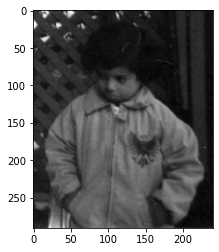

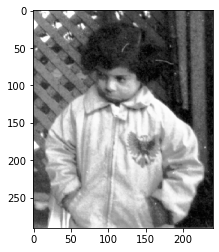

In [217]:
def histogramEqualization(I,h):
    h2=np.copy(h)
    for i in range (h.size):
        h2[i]=np.sum(h[:(i+1)])
    res=np.copy(I)
    res=np.where(True,np.max(I)/I.size*h2[res],0)
    return res.astype(int)

plt.imshow(img)
plt.show()
img2=histogramEqualization(img,computeHistogram(img))
plt.imshow(img2)
plt.show()

